In [63]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import math
import json
sns.set()
# ------------------------------------
from sklearn.preprocessing import StandardScaler
# ------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
# ------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
# ------------------------------------
from sklearn.metrics  import mean_squared_error

In [2]:
data = pd.read_csv('Hitters.csv')
df_hitters = data.copy()
df_hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [3]:
df_hitters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [4]:
print('The league types are:', df_hitters['League'].unique())
print('The divison types are:', df_hitters['Division'].unique())
print('The new league options are:', df_hitters['NewLeague'].unique())

The league types are: ['A' 'N']
The divison types are: ['E' 'W']
The new league options are: ['A' 'N']


In [7]:
df_hitters_num=pd.get_dummies(df_hitters,columns = ['League', 'Division', 'NewLeague'], drop_first=True)
df_hitters_num.head(5)



,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,False,False,False
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,True,True,True
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,False,True,False
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,True,False,True
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,True,False,True


In [9]:
df_hitters_num.isnull().sum()

AtBat           0
Hits            0
HmRun           0
Runs            0
RBI             0
Walks           0
Years           0
CAtBat          0
CHits           0
CHmRun          0
CRuns           0
CRBI            0
CWalks          0
PutOuts         0
Assists         0
Errors          0
Salary         59
League_N        0
Division_W      0
NewLeague_N     0
dtype: int64

In [10]:
df_hitters_num_notnull=df_hitters_num.dropna()
df_hitters_num_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AtBat        263 non-null    int64  
 1   Hits         263 non-null    int64  
 2   HmRun        263 non-null    int64  
 3   Runs         263 non-null    int64  
 4   RBI          263 non-null    int64  
 5   Walks        263 non-null    int64  
 6   Years        263 non-null    int64  
 7   CAtBat       263 non-null    int64  
 8   CHits        263 non-null    int64  
 9   CHmRun       263 non-null    int64  
 10  CRuns        263 non-null    int64  
 11  CRBI         263 non-null    int64  
 12  CWalks       263 non-null    int64  
 13  PutOuts      263 non-null    int64  
 14  Assists      263 non-null    int64  
 15  Errors       263 non-null    int64  
 16  Salary       263 non-null    float64
 17  League_N     263 non-null    bool   
 18  Division_W   263 non-null    bool   
 19  NewLeague_N  

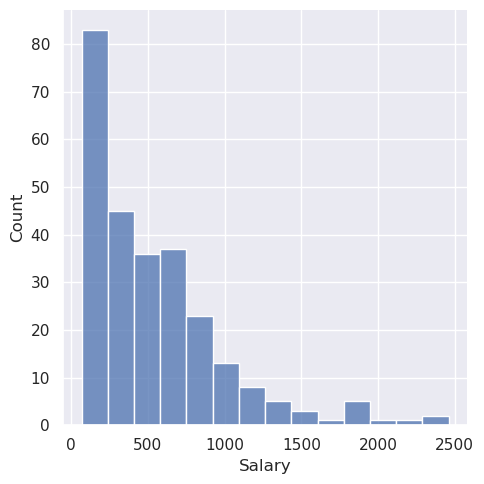

In [11]:
sns.displot(df_hitters_num_notnull["Salary"])

In [18]:
correlation=df_hitters_num_notnull.corr()
correlation["Salary"].sort_values(ascending=True)

Division_W    -0.192514
League_N      -0.014282
Errors        -0.005401
NewLeague_N   -0.002834
Assists        0.025436
PutOuts        0.300480
HmRun          0.343028
AtBat          0.394771
Years          0.400657
Runs           0.419859
Hits           0.438675
Walks          0.443867
RBI            0.449457
CWalks         0.489822
CHmRun         0.524931
CAtBat         0.526135
CHits          0.548910
CRuns          0.562678
CRBI           0.566966
Salary         1.000000
Name: Salary, dtype: float64

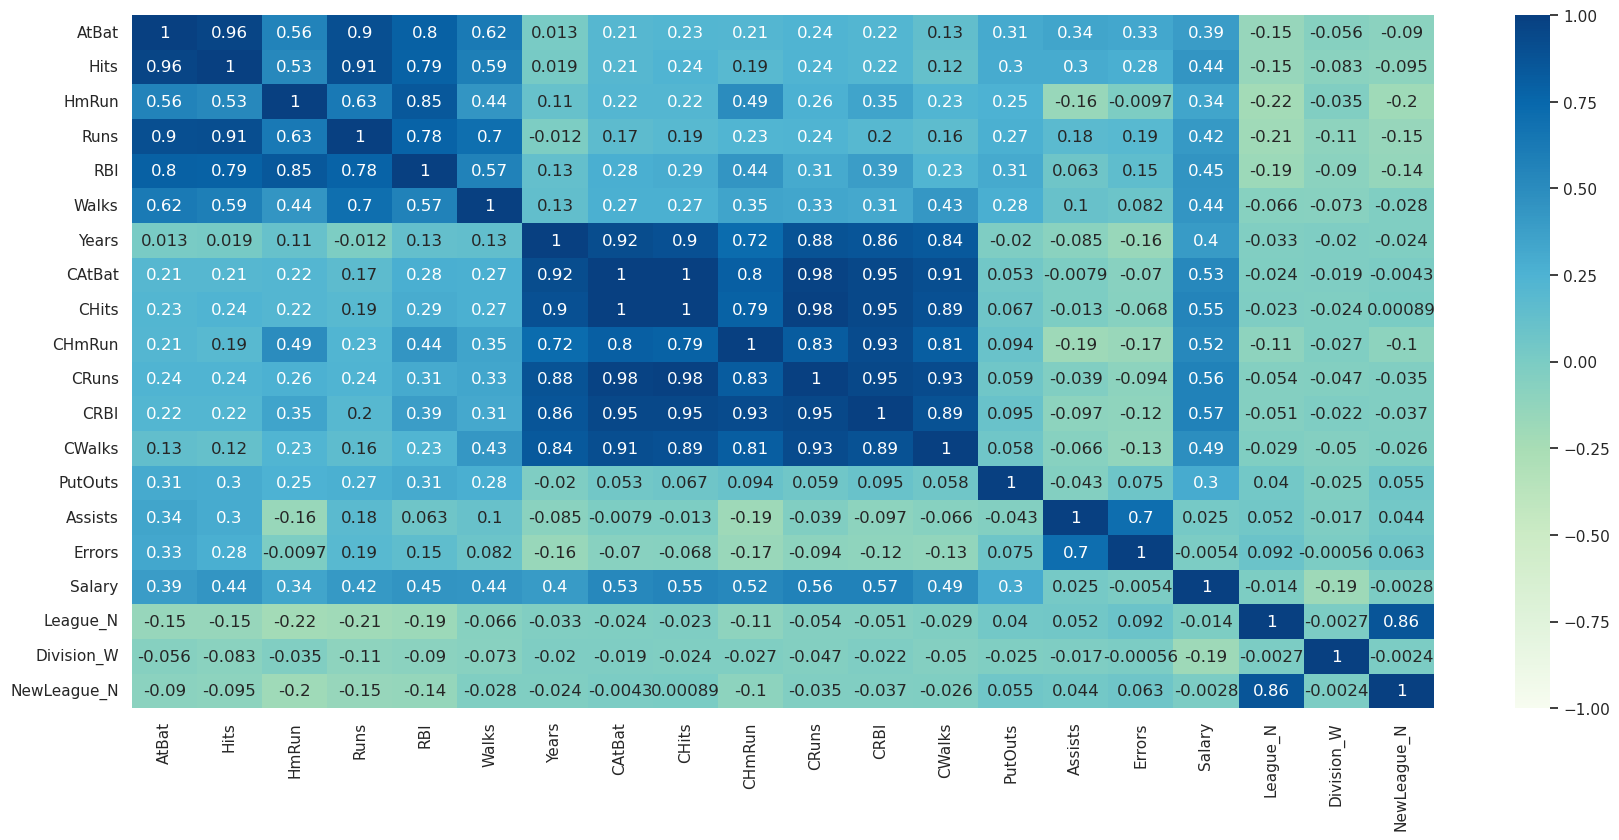

In [19]:
plt.figure(figsize=(21,9))
sns.heatmap(correlation,
            vmin = -1, 
            vmax = 1,
            cmap ="GnBu",
            annot=True)
plt.show()

## Declare the dependent and independent variables

In [21]:
x=df_hitters_num_notnull.drop("Salary",axis=1)
y=df_hitters_num_notnull["Salary"]

## Split the data into training and testing parts

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=365)

In [27]:
stander=StandardScaler()
x_train=stander.fit_transform(x_train)
x_test=stander.fit_transform(x_test)

## Perform linear regression

In [28]:
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [30]:
print("Linear Regression coefficients are: ",lin_reg.coef_)
print("Linear Regression y-intercept is: ",lin_reg.intercept_)

Linear Regression coefficients are:  [-216.58725574  176.6665394    26.42174341  -32.30723397    3.50396442
  114.47871878  -38.27993316 -900.68020534  836.55817419   28.55520441
  405.6848943    64.99526588 -187.22476547  115.53995185   68.62131273
  -13.90111177   58.90973857  -81.77905186  -35.02755069]
Linear Regression y-intercept is:  532.2961176470588


In [31]:
lin_reg_y_pred=lin_reg.predict(x_test)
lin_reg_y_pred

array([ 380.24418926,  399.87451252,  737.91194903,  748.74509099,
        335.47679515,  249.19687691,  171.30318749,  458.95392836,
       1062.63586363,  533.54746333,  453.37044448,  456.51273631,
        803.37263207,  713.53189528,  204.5850398 ,  318.84660615,
        337.85901874,  689.2827032 ,  140.33477547,  629.06483852,
        814.85395929,  179.25750676,  614.17111362, 1220.7837467 ,
       1271.92595006, 1588.19370726,  758.5961789 , 1067.61888337,
        594.81740622, 1160.9505637 ,  464.90135144,  277.61474475,
        356.87782477,  523.18742817,  184.73774953,  229.32826556,
        238.55559333,  884.46844487,  594.13834502,  200.05645983,
        315.14356448,  449.76152978,  827.44034304,  355.23048788,
        605.8752886 ,  287.51639302,  527.50444178,  554.99947568,
        641.68820271,  508.85917899, 1917.30779648,  702.09665465,
        351.8501473 ,  414.87262095, 1015.77590859,  683.21398809,
        538.78768445,   46.72954567,  176.1406326 ,  178.30613

In [32]:
lin_comp = pd.DataFrame({'Predicted': lin_reg_y_pred, 'Actual': y_test})
lin_comp

,Predicted,Actual
14,380.244189,240.0
181,399.874513,737.5
177,737.911949,1300.0
124,748.745091,737.5
277,335.476795,475.0
...,...,...
303,409.667227,425.0
264,366.905417,250.0
31,100.628374,110.0
204,296.364311,780.0


In [36]:
print("Linear Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lin_reg_y_pred)))
print("Linear Regression Model Training Score: ",lin_reg.score(x_train, y_train))
print("Linear Regression Model Testing Score: ",lin_reg.score(x_test, y_test))

Linear Regression Model RMSE is:  314.3739088049045
Linear Regression Model Training Score:  0.5680589160518967
Linear Regression Model Testing Score:  0.34085131302043703


## Perform ridge regression 

In [37]:
cv=RepeatedKFold(n_splits=5,n_repeats=3,random_state=1)

In [38]:
ridge=RidgeCV(np.arange(0.1,10,0.2),cv=cv,scoring="neg_mean_absolute_error")

In [43]:
ridge.fit(x_train,y_train)
ridge_reg_y_pred = ridge.predict(x_test)
print("Ridge tuning parameter:", (ridge.alpha_))
print ("Ridge model coefficients:", (ridge.coef_))
print ("Ridge model intercept:", (ridge.intercept_))

Ridge tuning parameter: 9.900000000000002
Ridge model coefficients: [ -99.64056512   87.85475144   -3.70978058   22.50316688   18.34973213
   68.1928924   -55.21554926   -5.93096462  127.21511684   21.56457876
  129.7438877    93.22509485 -102.97057988  116.56925232   31.19052366
  -10.05599857   39.05110375  -80.7269112   -22.53792401]
Ridge model intercept: 532.2961176470588


In [45]:
print("Ridge Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, ridge_reg_y_pred)))
print("Ridge Regression Model Training Score: ",ridge.score(x_train, y_train))
print("Ridge Regression Model Testing Score: ",ridge.score(x_test, y_test))

Ridge Regression Model RMSE is:  292.403879369762
Ridge Regression Model Training Score:  0.5278667721769686
Ridge Regression Model Testing Score:  0.42976133440448816


## Perform lasso regression

In [46]:
lasso = LassoCV(alphas=np.arange(0.1, 10.0, 0.1), cv=cv, tol = 1)

In [ ]:
lasso.fit(x_train,y_train)
lasso_reg_y_pred = lasso.predict(x_test)

print("Lasso tuning parameter:", (lasso.alpha_))
print ("Lasso model coefficients:", (lasso.coef_))
print ("Lassso model intercept:", (lasso.intercept_))

Lasso tuning parameter: 8.2
Lasso model coefficients: [ 55.51095192  45.97703489  27.53137446   3.3631333    9.03843356
  49.43671419 126.70293106  45.10058938  23.05442632   9.85632406
   0.           3.15689767  -8.11886084 102.94992196   0.
  -0.          17.76359236 -85.73614642  -0.        ]
Lassso model intercept: 532.2961176470588


In [50]:
print("Lasso Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lasso_reg_y_pred)))
print("Lasso Regression Model Training Score: ",lasso.score(x_train, y_train))
print("Lasso Regression Model Testing Score: ",lasso.score(x_test, y_test))

Lasso Regression Model RMSE is:  304.28045231123826
Lasso Regression Model Training Score:  0.4482426197173428
Lasso Regression Model Testing Score:  0.3824978021532077


## Compare the score

In [56]:
print("Linear Regression Model Training Score: ",lin_reg.score(x_train, y_train))
print("Linear Regression Model Testing Score:  " ,lin_reg.score(x_test, y_test))
print("Ridge Regression Model Training Score:  " ,ridge.score(x_train, y_train))
print("Ridge Regression Model Testing Score:   "  ,ridge.score(x_test, y_test))
print("Lasso Regression Model Training Score:  " ,lasso.score(x_train, y_train))
print("Lasso Regression Model Testing Score:   "  ,lasso.score(x_test, y_test))

Linear Regression Model Training Score:  0.5680589160518967
Linear Regression Model Testing Score:   0.34085131302043703
Ridge Regression Model Training Score:   0.5278667721769686
Ridge Regression Model Testing Score:    0.42976133440448816
Lasso Regression Model Training Score:   0.4482426197173428
Lasso Regression Model Testing Score:    0.3824978021532077


In [61]:
lasso_alpha=lasso.alpha_
lasso_coef=lasso.coef_
lasso_intercept=lasso.intercept_


ridge_alpha=ridge.alpha_
ridge_coef=ridge.coef_
ridge_intercept=ridge.intercept_


lin_reg_coef=lin_reg.coef_
lin_reg_intercept=lin_reg.intercept_


In [65]:
with open("linear_params.json", "w") as f:
    json.dump({
        "lasso_alpha": float(lasso.alpha_),
        "lasso_coef": lasso.coef_.tolist(),
        "lasso_intercept": float(lasso.intercept_),
        "ridge_alpha": float(ridge.alpha_),
        "ridge_coef": ridge.coef_.tolist(),
        "ridge_intercept": float(ridge.intercept_),
        "lin_reg_coef": lin_reg.coef_.tolist(),
        "lin_reg_intercept": float(lin_reg.intercept_)
    }, f)

## Root mean squared error

In [66]:
print("Linear Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lin_reg_y_pred)))
print("Ridge Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, ridge_reg_y_pred)))
print("Lasso Regression Model RMSE is: ", math.sqrt(mean_squared_error(y_test, lasso_reg_y_pred)))

Linear Regression Model RMSE is:  314.3739088049045
Ridge Regression Model RMSE is:  292.403879369762
Lasso Regression Model RMSE is:  304.28045231123826


## Replacing the missing values in the DataFrame

In [67]:
df_hitters_nan = df_hitters_num[df_hitters_num['Salary'].isnull()]
df_hitters_nan

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,NaN,False,False,False
15,183,39,3,20,15,11,3,201,42,3,20,16,11,118,0,0,NaN,False,True,False
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,912,88,9,NaN,False,True,False
22,22,10,1,4,2,1,6,84,26,2,9,9,3,812,84,11,NaN,False,True,False
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,127,221,7,NaN,False,True,False
32,517,141,27,70,87,52,9,3571,994,215,545,652,337,1378,102,8,NaN,True,True,True
36,161,36,0,19,10,17,4,1053,244,3,156,86,107,70,149,12,NaN,False,False,False
38,346,98,5,31,53,30,16,5913,1615,235,784,901,560,0,0,0,NaN,False,False,False
39,241,61,1,34,12,14,1,241,61,1,34,12,14,166,172,10,NaN,True,True,True
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,103,84,5,NaN,True,True,True


In [68]:
X_nan = df_hitters_nan.drop('Salary', axis = 1)
y_nan = df_hitters_nan['Salary']

In [71]:
X_nan = stander.transform(X_nan)

In [72]:
nan_pred = ridge.predict(X_nan)
nan_pred

array([ 293.72994999,  -37.78034548,  927.79452116,  245.56856608,
        607.25114922, 1233.39712822,  206.3527202 ,  753.57934801,
         93.55538542,  529.87093953,  204.72643307,  504.21359494,
       1372.53501522,   39.003448  ,  560.02624334,  -74.12157636,
        308.50209092,  589.76045536,  317.06734402,  282.10952051,
        929.24561206,   57.15846697,  236.95017734,  686.67630426,
        448.0619597 ,  653.92277404, 1001.12583057,  139.72895418,
        160.25622702,  985.29798838,  426.21684357,  223.94865112,
        318.2056192 ,   64.02130418,  310.06777592,  492.93216922,
         48.65836867,  254.98450136,  264.09694108,  164.84170829,
        183.85298065,  465.75897345,  258.57147916,  425.34059881,
        279.93104983,  405.17050572,  404.51340134, 1019.43742331,
        776.37536073,    7.85810104,   27.95913315,  264.73723017,
        118.8948455 ,  150.22063806,  654.28418992,  162.89185187,
       1227.96662781,  851.64784934,  324.87280808])

In [73]:
df_nan_full = df_hitters_nan.copy()
df_nan_full['Salary'] = nan_pred
df_nan_full

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293,66,1,30,29,14,1,293,66,1,30,29,14,446,33,20,293.729950,False,False,False
15,183,39,3,20,15,11,3,201,42,3,20,16,11,118,0,0,-37.780345,False,True,False
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,912,88,9,927.794521,False,True,False
22,22,10,1,4,2,1,6,84,26,2,9,9,3,812,84,11,245.568566,False,True,False
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,127,221,7,607.251149,False,True,False
32,517,141,27,70,87,52,9,3571,994,215,545,652,337,1378,102,8,1233.397128,True,True,True
36,161,36,0,19,10,17,4,1053,244,3,156,86,107,70,149,12,206.352720,False,False,False
38,346,98,5,31,53,30,16,5913,1615,235,784,901,560,0,0,0,753.579348,False,False,False
39,241,61,1,34,12,14,1,241,61,1,34,12,14,166,172,10,93.555385,True,True,True
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,103,84,5,529.870940,True,True,True


In [77]:
df_hitters.columns

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')